<a href="https://colab.research.google.com/github/LuisRodarteSolorzano/Econometria_Analisis_de_Datos_e_IA_en_software/blob/main/Copia_de_var_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Vectores Autoregresivos (VAR)

## Motivación  

Los modelos de Vectores Autorregresivos (VAR) son herramientas fundamentales en macroeconometría y en el análisis de series temporales multivariadas.

Antes de la introducción de los VAR, la macroeconomía se basaba en modelos estructurales con restricciones a priori, lo que dificultaba la identificación empírica de las relaciones entre variables.  

El modelo VAR surge como una alternativa que permite modelar la **evolución conjunta de múltiples variables económicas sin imponer restricciones teóricas fuertes**. En lugar de asumir una estructura predeterminada, los **VAR permiten que los datos determinen la dinámica de las relaciones entre variables, basándose en sus propios valores pasados**.  

Ejemplos de aplicaciones incluyen:  
- **Análisis de política monetaria**: ¿Cómo responde la inflación al cambio en la tasa de interés?  
- **Ciclo económico y empleo**: ¿Cómo interactúan el PIB, el desempleo y la inversión?  
- **Impacto de shocks externos**: ¿Cómo afecta una crisis financiera a las variables macroeconómicas?  

## Breve Historia del VAR  

El modelo VAR fue introducido por **Christopher Sims (1980)** como una respuesta a la excesiva dependencia de modelos macroeconómicos estructurales que imponían restricciones fuertes en las relaciones entre variables. Sims argumentó que las **restricciones previas muchas veces carecían de fundamento empírico** y que, en su lugar, era preferible permitir que los datos "hablaran por sí mismos".  

Antes de los VAR, los modelos econométricos estructurales intentaban capturar la relación entre variables económicas mediante **ecuaciones simultáneas con restricciones impuestas por la teoría**. Sin embargo, estas restricciones a menudo eran arbitrarias y no siempre reflejaban la verdadera dinámica económica.  

Los modelos VAR ofrecieron una solución al tratar cada variable como una función de sus propios retardos y de los retardos de otras variables, evitando la necesidad de imponer restricciones estructurales exógenas.

Desde su introducción, los VAR se han convertido en una herramienta esencial en macroeconometría y finanzas, con extensiones como los **VAR estructurales (SVAR)** para identificación causal y los **Bayesian VAR (BVAR)** para mejorar la estimación en muestras pequeñas.  


# Vectores Autorregresivos (VAR)  


El modelo VAR (Vectores Autorregresivos) es un modelo multivariado de la media condicional, ampliamente utilizado en macroeconometría para analizar la dinámica conjunta de múltiples series temporales.  

Consideremos un vector columna de $k$ variables, denotado por  

$$
Y_t = \begin{bmatrix} y_{1t} \\ y_{2t} \\ \vdots \\ y_{kt} \end{bmatrix},
$$  

donde cada $y_{it}$ representa una serie temporal de interés. Un modelo VAR de orden $p$, denotado como VAR($p$), se expresa como  

$$
Y_t = A_0 + \sum_{i=1}^{p} A_i Y_{t-i} + \varepsilon_t.
$$


$$
\begin{bmatrix} A_{1} \\ A_{2} \\ A_{3} \\ \vdots \\ A_{k}  \end{bmatrix}
$$

$$
A_i =
\begin{bmatrix}
A_{11} & A_{12} & A_{13} & \cdots & A_{1k} \\  
A_{21} & A_{22} & A_{23} & \cdots & A_{1k} \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
A_{n1} & A_{n2} & A_{n3} & \cdots & A_{nk}
\end{bmatrix}
$$

$$
Y_{t-p} =
\begin{bmatrix}
y_{1t-1} \\
y_{2t-1} \\
\vdots  \\
y_{kt-p}  \\
\end{bmatrix}
$$  

## Definición de los parámetros:
- $A_0 \in \mathbb{R}^{k\times1}$ es un vector de términos constantes (interceptos).  
- $A_i \in \mathbb{R}^{k\times k}$ son matrices de coeficientes que capturan las relaciones entre las variables con sus retardos. Cada $A_i$ define cómo las observaciones pasadas de $Y_t$ afectan a la evolución futura del sistema.  
- $\varepsilon_t$ es un vector de innovaciones aleatorias con las siguientes propiedades:  
  - $\varepsilon_t \stackrel{iid}{\sim} \mathcal{N}(0_{k\times1},\Sigma)$, es decir, sigue una distribución normal multivariada con media cero y matriz de varianza-covarianza $\Sigma$.  
  - La matriz de varianza-covarianza de los errores se define como $\Sigma = CC'$, donde $C \in \mathbb{R}^{k\times k}$.  
  - Como $\Sigma$ es el producto de $C$ con su traspuesta, se garantiza que es una matriz definida positiva, lo que implica que las perturbaciones $\varepsilon_t$ tienen una dispersión finita y bien definida.  

Este modelo permite capturar la interdependencia entre múltiples series temporales y estudiar cómo los efectos de choques en una variable se propagan a lo largo del tiempo a las demás variables del sistema.


# Estimación de un Modelo VAR con $p=1$

Supongamos que el vector de variables endógenas está definido como:

$$
Y_t = \begin{bmatrix} \Delta\%PBI_t \\ \Delta\%P_t \\ i_t \end{bmatrix},
$$

donde:
- $\Delta\%PBI_t$ representa la variación porcentual del Producto Bruto Interno (PBI).
- $\Delta\%P_t$ representa la variación porcentual del nivel de precios.
- $i_t$ es la tasa de interés.

El modelo VAR(1) se especifica de la siguiente manera:

$$
\begin{bmatrix} \Delta\%PBI_t \\ \Delta\%P_t \\ i_t \end{bmatrix} =
\begin{bmatrix} A_{10} \\ A_{20} \\ A_{30} \end{bmatrix}
+ \begin{bmatrix} A_{11} & A_{12} & A_{13} \\ A_{21} & A_{22} & A_{23} \\ A_{31} & A_{32} & A_{33} \end{bmatrix}
\begin{bmatrix} \Delta\%PBI_{t-1} \\ \Delta\%P_{t-1} \\ i_{t-1} \end{bmatrix}
+ \begin{bmatrix} \varepsilon_{t}^{PBI} \\ \varepsilon_{t}^{P} \\ \varepsilon_{t}^{i} \end{bmatrix}
$$

o expresado como un sistema de ecuaciones individuales:

$$
\Delta\%PBI_t = A_{10} + A_{11} \Delta\%PBI_{t-1} + A_{12} \Delta\%P_{t-1} + A_{13} i_{t-1} + \varepsilon_{t}^{PBI}
$$

$$
\Delta\%P_t = A_{20} + A_{21} \Delta\%PBI_{t-1} + A_{22} \Delta\%P_{t-1} + A_{23} i_{t-1} + \varepsilon_{t}^{P}
$$

$$
i_t = A_{30} + A_{31} \Delta\%PBI_{t-1} + A_{32} \Delta\%P_{t-1} + A_{33} i_{t-1} + \varepsilon_{t}^{i}
$$

## Preguntas de interpretación:

1. **¿Es este modelo un sistema de regresiones aparentemente no relacionadas (SUR)?**  
   - En un SUR, las ecuaciones individuales tienen errores correlacionados entre sí, lo que mejora la eficiencia de la estimación. Sin embargo, en un VAR, cada ecuación incluye retardos de las variables endógenas, lo que introduce una estructura dinámica.  
   - Si los términos de error $\varepsilon_t$ están correlacionados, podría verse como una extensión dinámica de SUR.

2. **¿Existe una interpretación causal de los coeficientes $A_{ij}$?**  
   - No necesariamente. Los coeficientes capturan relaciones dinámicas entre las variables, pero no implican causalidad en un sentido estricto.  
   - Para establecer causalidad, sería necesario un análisis adicional, como identificación estructural (VAR estructural, SVAR) o estrategias de identificación exógena (instrumentos o choques exógenos).

3. **Relaciones dinámicas lineales:**  
   - Correlación contemporánea:  
     $$
     \text{corr}(\Delta\%PBI_t, i_t)
     $$
   - Correlación con el pasado inmediato:  
     $$
     \text{corr}(\Delta\%PBI_t, i_{t-1})
     $$
   - Relación de simetría temporal en las correlaciones:  
     $$
     \text{corr}(\Delta\%PBI_t, i_{t+1}) = \text{corr}(\Delta\%PBI_{t-1}, i_t)?
     $$
   - Esta última relación sugiere que, si el proceso es estacionario, las correlaciones cruzadas deberían reflejar cierta simetría en la dinámica temporal.

Este modelo proporciona un marco útil para analizar las interacciones entre el crecimiento económico, la inflación y la política monetaria a través de la tasa de interés.


---

# Referencias

Aquí se presentan diez referencias clave sobre modelos VAR en formato APA:

1. **Sims, C. A.** (1980). Macroeconomics and reality. *Econometrica, 48*(1), 1-48. https://doi.org/10.2307/1912017  

2. **Stock, J. H., & Watson, M. W.** (2001). Vector autoregressions. *Journal of Economic Perspectives, 15*(4), 101-115. https://doi.org/10.1257/jep.15.4.101  

3. **Lütkepohl, H.** (2005). *New introduction to multiple time series analysis*. Springer.  

4. **Hamilton, J. D.** (1994). *Time series analysis*. Princeton University Press.  

5. **Kilian, L., & Lütkepohl, H.** (2017). *Structural vector autoregressive analysis*. Cambridge University Press.  

6. **Canova, F.** (2007). *Methods for applied macroeconomic research*. Princeton University Press.  

7. **Sims, C. A., & Zha, T.** (1999). Error bands for impulse responses. *Econometrica, 67*(5), 1113-1155. https://doi.org/10.1111/1468-0262.00071  

8. **Christiano, L. J., Eichenbaum, M., & Evans, C. L.** (1999). Monetary policy shocks: What have we learned and to what end? *Handbook of Macroeconomics, 1*(A), 65-148.  

9. **Sargent, T. J.** (1984). *Autoregressions, expectations, and macroeconomic dynamics*. Harvard University Press.  

10. **Lütkepohl, H., & Krätzig, M.** (2004). *Applied time series econometrics*. Cambridge University Press.  

---

Contenido:
* Estimación por Mínimos Cuadrados Ordinarios (OLS)
* Determinación del rezago
* Prueba de causalidad de Granger
* Pronóstico

Para proporcionar un ejemplo, se utilizara el artículo de Christiano, Eichenbaum y Evans (2005), disponible [aquí](https://www.jstor.org/stable/10.1086/426038?seq=1#metadata_info_tab_contents). CEE2005 en adelante.


- El artículo de Christiano, Eichenbaum y Evans (2005), titulado "Nominal Rigidities and the Dynamic Effects of a Shock to Monetary Policy", es un trabajo influyente en macroeconomía empírica que analiza los efectos de los choques de política monetaria en la economía utilizando un modelo VAR estructural (SVAR).


- El objetivo principal del artículo es examinar los efectos dinámicos de un choque de política monetaria sobre variables clave de la economía real y nominal. Los autores incorporan rigideces nominales y fricciones reales en el modelo para capturar cómo las perturbaciones monetarias afectan la producción, los precios y otras variables económicas.

- Metodología y estimación

Utilizan un SVAR para identificar los choques de política monetaria, aplicando restricciones de corto plazo inspiradas en la literatura de identificación estructural.
Implementan un análisis de impulso-respuesta para evaluar cómo las variables reaccionan ante un choque de política monetaria.
Realizan una descomposición de varianza para medir la contribución de los choques monetarios en la variabilidad de las variables macroeconómicas.
Variables utilizadas

- Incluye las siguientes variables:

    - Producción (Output, $Y_t$) – Generalmente medida a través del Producto Interno Bruto (PIB) real o Producción Industrial.
    - Nivel de Precios ($P_t$) – Utilizan un índice de precios como el IPC para capturar la dinámica de la inflación.
    - Tasa de interés ($i_t$) – Representa la política monetaria, generalmente la tasa de los fondos federales en EE.UU.
    - Agregados monetarios ($M_t$) – Como M1 o M2, para analizar la respuesta de la oferta monetaria a choques de política.
    - Salarios reales ($w_t$) – Para capturar los efectos de los choques monetarios sobre el mercado laboral.

- Principales hallazgos
Un shock monetario contractivo (es decir, un aumento inesperado en la tasa de interés) tiene un impacto negativo y persistente en la producción y el empleo.
Existe evidencia de rigideces nominales, ya que los precios y salarios ajustan lentamente ante choques monetarios.
La política monetaria tiene efectos reales a corto y mediano plazo, en línea con la teoría de fricciones nominales.
Este estudio es una referencia clave en macroeconomía empírica y ha influenciado el desarrollo de modelos DSGE con rigideces nominales.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Primero importemos los paquetes requeridos:
#pip install pandas
#!pip install pandas-datareader

In [1]:
!pip install pandas

In [2]:
!pip install pandas-datareader

In [3]:
import pandas as pd  # Manejo y análisis de datos en estructuras tipo DataFrame.
import pandas_datareader as web  # Descarga de datos financieros desde fuentes en línea.
import statsmodels.api as sm  # Modelos estadísticos y pruebas econométricas.
from statsmodels.tsa.api import VAR  # Estimación de modelos VAR (Vectores Autorregresivos).
import numpy as np  # Operaciones matemáticas y manejo de arreglos numéricos.
import datetime  # Manipulación de fechas y horas.
import matplotlib.pyplot as plt  # Generación de gráficos.
from pandas.plotting import register_matplotlib_converters  # Compatibilidad entre pandas y Matplotlib.
pd.plotting.register_matplotlib_converters()  # Registra conversores para graficar fechas correctamente.
#%matplotlib inline  # Muestra los gráficos directamente en Jupyter Notebook.

* Upload data (see page 4 in CEE2005)

In [6]:
start = datetime.datetime(1965,1,1)  # Define la fecha de inicio del periodo de análisis.
end   = datetime.datetime(2004,12,31)  # Define la fecha de fin del periodo de análisis.

EFF  = web.DataReader('DFF', 'fred', start=start, end=end)  # Descarga la tasa de fondos federales (EFF) desde FRED.
EFF  = EFF.resample('Q').mean()  # Convierte la serie a frecuencia trimestral calculando el promedio en cada trimestre.
index = EFF.index  # Guarda el índice de fechas de EFF para su uso posterior.

RGDP = web.DataReader('GDPC1', 'fred', start=start, end=end)  # Descarga el PIB real (GDPC1) desde FRED.
CONS = web.DataReader('PCECC96', 'fred', start=start, end=end)  # Descarga el consumo real (PCECC96) desde FRED.
DEF  = web.DataReader('GDPDEF', 'fred', start=start, end=end)  # Descarga el deflactor del PIB (GDPDEF) desde FRED.
RINV = web.DataReader('RINV', 'fred', start=start, end=end)  # Descarga la inversión real (RINV) desde FRED.
TLP  = web.DataReader('ULQELP01USQ661S', 'fred', start=start, end=end)  # Descarga la productividad laboral (TLP) desde FRED.
PRF  = web.DataReader('CP', 'fred', start=start, end=end)  # Descarga los beneficios corporativos (PRF) desde FRED.
M2   = web.DataReader('MABMM201USQ189S', 'fred', start=datetime.datetime(1964,9,1), end=end)
# Descarga el agregado monetario M2 desde FRED, comenzando en septiembre de 1964.

DM2  = (M2/M2.shift(1)).dropna()  # Calcula la tasa de crecimiento de M2 y elimina valores NaN.

CPI  = web.DataReader('CPALTT01USQ661S', 'fred', start=start, end=end)  # Descarga el índice de precios al consumidor (CPI) desde FRED.

# Asegura que todas las series tengan el mismo índice temporal basado en la serie EFF.
RGDP.index = EFF.index
CONS.index = EFF.index
DEF.index = EFF.index
RINV.index = EFF.index
TLP.index = EFF.index
PRF.index = EFF.index
DM2.index = EFF.index
CPI.index = EFF.index

# Carga datos de salarios reales desde un archivo CSV descargado del BLS.
RWAG = pd.read_csv('/content/drive/MyDrive/Econometria Analisis de Datos e IA en software/MACROECONOMETRÍA Y ANÁLISIS DE DATOS/BLS_Wage.csv')
RWAG.index = RGDP.index  # Ajusta el índice temporal de los salarios reales para que coincida con el PIB real.


/tmp/ipython-input-2301575007.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  EFF  = EFF.resample('Q').mean()  # Convierte la serie a frecuencia trimestral calculando el promedio en cada trimestre.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Transformation as in CEE2005

In [9]:
yy = np.log(RGDP)  # Toma el logaritmo natural del PIB real.
cc = np.log(CONS)  # Toma el logaritmo natural del consumo real.
dd = np.log(DEF)   # Toma el logaritmo natural del deflactor del PIB.
ii = np.log(RINV)  # Toma el logaritmo natural de la inversión real.
ww = np.log(RWAG)  # Toma el logaritmo natural de los salarios reales.
lp = np.log(TLP)   # Toma el logaritmo natural de la productividad laboral.
rr = EFF  # Asigna la tasa de interés de los fondos federales sin transformación.

# Calcula la rentabilidad ajustada a la inflación dividiendo los beneficios por el índice de precios,
# luego toma el logaritmo natural y lo convierte en un DataFrame.
rp = pd.DataFrame(np.log(PRF.values / CPI.values))
rp.index = index  # Asegura que el índice temporal coincida con las otras variables.

dm = np.log(DM2)  # Toma el logaritmo natural de la tasa de crecimiento del agregado monetario M2.

# Crea un DataFrame con todas las variables transformadas y las organiza en una estructura unificada.
DF = pd.concat([dm, rp, -1 * rr, lp, ww, ii, dd, cc, yy], axis=1)

# Renombra las columnas del DataFrame con etiquetas más cortas para facilitar su uso en análisis y modelos.
DF.columns = ['dm2', 'prof', 'nr', 'lp', 'w', 'inv', 'def', 'c', 'y']

# Muestra las primeras filas del DataFrame para verificar la estructura de los datos.
DF.head()


,dm2,prof,nr,lp,w,inv,def,c,y
DATE,,,,,,,,,
1965-03-31,0.019790,1.345570,-3.977222,3.896023,2.106570,5.918360,2.800629,7.868738,8.380711
1965-06-30,0.016515,1.375513,-4.079451,3.898518,2.109364,5.938433,2.805237,7.879707,8.393267
1965-09-30,0.019316,1.390331,-4.077500,3.913871,2.117460,5.971313,2.809101,7.896743,8.415255
1965-12-31,0.021659,1.440672,-4.170761,3.930256,2.124654,6.006676,2.815947,7.924468,8.438033
1966-03-31,0.019050,1.458244,-4.559000,3.949493,2.120703,6.054825,2.822331,7.939123,8.462080


* Create a VAR model (class).

  Description: [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.vector_ar.var_model.VAR.html#statsmodels.tsa.vector_ar.var_model.VAR)

In [10]:
model = VAR(DF)  # Crea un modelo de Vectores Autorregresivos (VAR) utilizando el DataFrame DF como entrada.

```model``` is a class with methods described in the link above. The method fit allow us to estimate the VAR model. For instance, A VAR(3) is estimated as follows.

## Estimation
Method ```fit``` (details [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.vector_ar.var_model.VAR.fit.html#statsmodels.tsa.vector_ar.var_model.VAR.fit))

In [11]:
nlag = 3
results = model.fit(nlag)

```results``` is another class that contain some information related to the estimation and some methods as well. See [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html#statsmodels.tsa.vector_ar.var_model.VARResults) for more details. An estimation summary could be printed with method 'summary':

In [12]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Oct, 2025
Time:                     23:50:40
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -76.2238
Nobs:                     157.000    HQIC:                  -79.1370
Log likelihood:           4615.69    FPE:                6.04012e-36
AIC:                     -81.1293    Det(Omega_mle):     1.37910e-36
--------------------------------------------------------------------
Results for equation dm2
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.152112         0.226517            0.672           0.502
L1.dm2          0.431409         0.099191            4.349           0.000
L1.prof        -0.023389         0.012809           -1.826           0.068
L1.nr      

# Comentario del Modelo VAR

## **Información General del Modelo**

- **Número de ecuaciones:** 9 → Indica que el VAR incluye 9 variables endógenas.
- **Número de observaciones:** 157 → Muestra la cantidad de datos disponibles para la estimación.
- **Log-likelihood:** 4615.69 → Una métrica que ayuda a comparar modelos (valores más altos indican mejor ajuste).
- **Criterios de información:**  
  - **AIC (-81.1293), BIC (-76.2238), HQIC (-79.1370)** → Ayudan a determinar el mejor orden del VAR (\( p \)).
- **Det(Omega_mle):** $1.37910 \times 10^{-36}$ → Determinante de la matriz de varianza-covarianza de los errores.

## **Resultados para la ecuación de la variable `dm2` (crecimiento del dinero M2 en logaritmos)**

- **Intercepto (`const`)**: No es estadísticamente significativo (p-valor = 0.502).
- **Primer rezago de `dm2` (`L1.dm2`)**: Positivo y altamente significativo (p-valor = 0.000), lo que sugiere persistencia en el crecimiento del dinero.
- **Primer rezago de `prof` (`L1.prof`)**: Coeficiente negativo (-0.023389) y marginalmente significativo (p-valor = 0.068), lo que sugiere que una mayor rentabilidad reduce el crecimiento de M2.
- **Primer rezago de `nr` (`L1.nr`)**: Coeficiente positivo y significativo al 10% (p-valor = 0.052), indicando que una reducción de tasas de interés podría estar asociada con mayor crecimiento monetario.
- **Otros rezagos (`L1.lp`, `L1.w`, `L1.inv`, `L1.def`, `L1.c`)**: No son estadísticamente significativos al 5%, pero algunos muestran tendencias cercanas a la significancia.



or 'plot' to draw the input time series

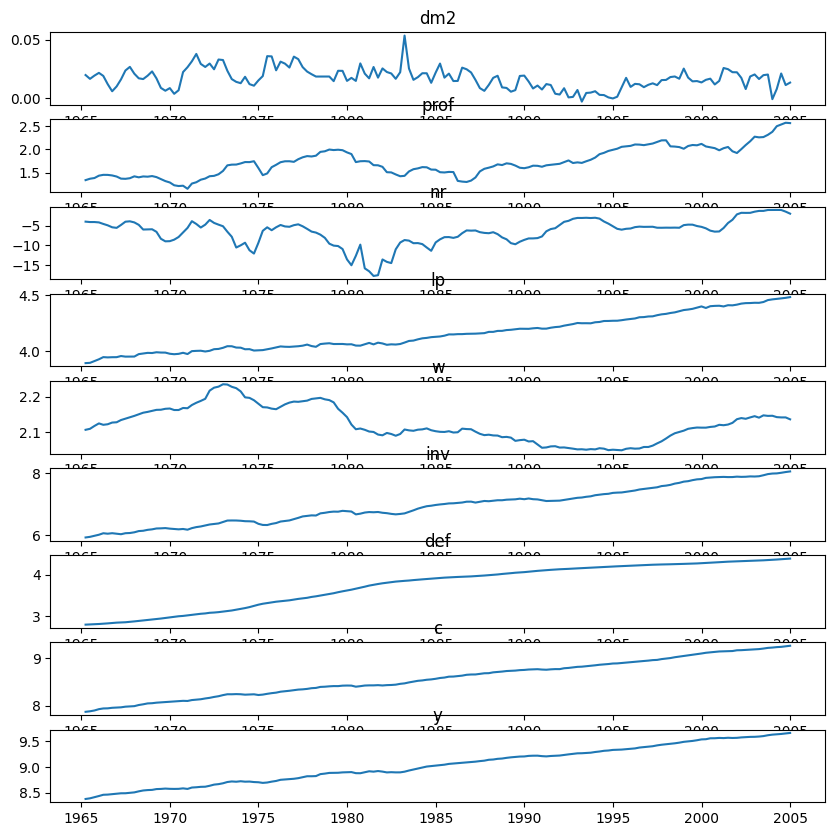

In [13]:
_ = results.plot()

or 'plot_acorr' to draw the ACF of residuals (see [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.vector_ar.var_model.VARResults.plot_acorr.html#statsmodels.tsa.vector_ar.var_model.VARResults.plot_acorr))

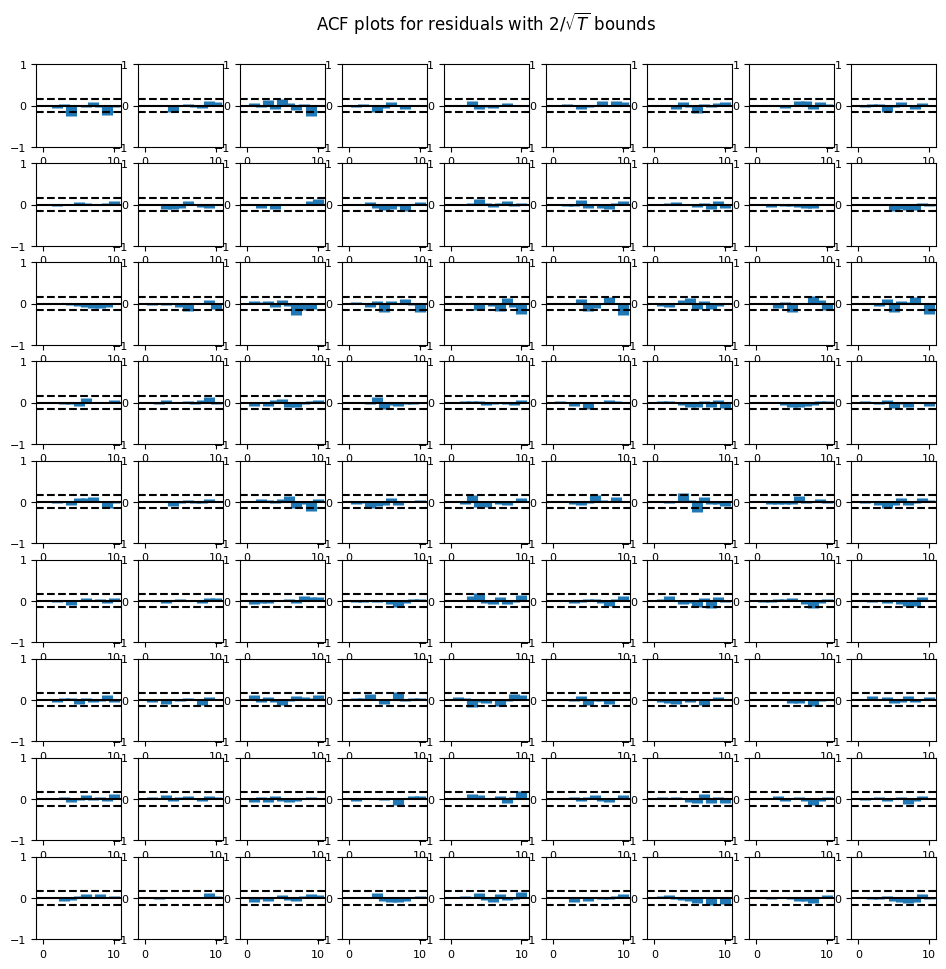

In [14]:
_ = results.plot_acorr()
# Genera gráficos de autocorrelación de los residuos del modelo VAR para evaluar si hay dependencia temporal en los errores.

## Lag selection
The method 'select_order' summarizes the best lag at all information criteria supported

In [15]:
max_lags = 6  # Define el número máximo de rezagos a considerar en la selección del modelo VAR.

model.select_order(max_lags).summary()
# Evalúa diferentes órdenes de rezago (hasta un máximo de 6) y selecciona el mejor según criterios de información.
# Luego, muestra un resumen con los valores de AIC, BIC, HQIC y FPE para cada opción de rezago.


,AIC,BIC,FPE,HQIC
0,-51.05,-50.87,6.769e-23,-50.98
1,-80.72,-78.94*,8.841e-36,-79.99*
2,-81.25*,-77.88,5.239e-36*,-79.88
3,-81.19,-76.23,5.670e-36,-79.18
4,-81.15,-74.58,6.233e-36,-78.48
5,-80.92,-72.76,8.485e-36,-77.61
6,-80.79,-71.03,1.097e-35,-76.83


From 'select_order', the best lag can be introduced manually. Alternatively, ```StatsModels``` allows for automatic determination of lags, given a criteria. For instance, lets use BIC

In [16]:
info = 'bic'
results = model.fit(maxlags=max_lags, ic=info)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Oct, 2025
Time:                     23:51:08
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -79.0001
Nobs:                     159.000    HQIC:                  -80.0317
Log likelihood:           4478.10    FPE:                8.64856e-36
AIC:                     -80.7372    Det(Omega_mle):     4.99502e-36
--------------------------------------------------------------------
Results for equation dm2
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.143956         0.186067            0.774           0.439
L1.dm2          0.533038         0.075427            7.067           0.000
L1.prof        -0.001569         0.003220           -0.487           0.626
L1.nr      

As CEE2005 use 4 lags, I will ignore that the optimal lag determined by BIC is 1. I will keepusing 4 lags from now onwards

In [17]:
nlag = 4
results = model.fit(nlag)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Oct, 2025
Time:                     23:51:26
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -74.5843
Nobs:                     156.000    HQIC:                  -78.4504
Log likelihood:           4666.19    FPE:                6.56252e-36
AIC:                     -81.0946    Det(Omega_mle):     9.66443e-37
--------------------------------------------------------------------
Results for equation dm2
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.303458         0.245481            1.236           0.216
L1.dm2          0.417485         0.101566            4.110           0.000
L1.prof        -0.022863         0.012827           -1.782           0.075
L1.nr      

## Granger causality test
```test_causality``` is th emethod that perfomrs the Granger causality test
* **Note**: *Granger causality $\neq$ causality*. A variable $x$ Granger cause $y$ if the lags of $x$ can predict movements in $y$

 - Realiza un test de causalidad de Granger para evaluar si la variable nr (tasa de interés) Granger-causa a la variable y (PIB real).
 - Usa una prueba F (kind='f') para determinar si los coeficientes de los rezagos de nr en la ecuación de y son estadísticamente significativos.
 - Si los coeficientes son significativos, se rechaza la hipótesis nula de "nr no causa en el sentido de Granger a y", lo que sugiere que nr contiene información predictiva sobre y.

$H_0$: hipótesis nula de "nr **no** causa en el sentido de Granger a y"

$H_1$: hipótesis nula de "nr *si* causa en el sentido de Granger a y"

In [18]:
results.test_causality('y', 'nr', kind='f').summary()

Test statistic,Critical value,p-value,df
4.117,2.380,0.003,"(4, 1071)"


There is evidence in favor of lags in the interest rate affecting gdp.

In [19]:
# Realiza una prueba de causalidad de Granger entre 'nr' y 'y'
results.test_causality('y', 'nr', kind='f').summary()

# results: Contiene los resultados del modelo VAR ajustado previamente

# test_causality('y', 'nr', kind='f'):
# - Evalúa si la variable 'nr' Granger-causa a 'y'
# - Prueba la hipótesis nula: "Los rezagos de 'nr' no tienen efecto predictivo sobre 'y'"
# - 'y': Variable dependiente
# - 'nr': Variable independiente que podría explicar 'y'
# - kind='f': Usa la prueba F para comparar modelos con y sin 'nr'

# .summary(): Muestra el resultado del test, incluyendo:
# - Estadístico F
# - Grados de libertad
# - p-valor (si es menor a 0.05, se rechaza la hipótesis nula y se concluye que 'nr' Granger-causa a 'y')


Test statistic,Critical value,p-value,df
4.117,2.380,0.003,"(4, 1071)"


# **Interpretación del resultado de la prueba de causalidad de Granger**

## **Hipótesis de la prueba:**

- **Hipótesis nula (\(H_0\))**: `nr` (tasa de interés) **no causa en el sentido de Granger** a `y` (PIB real).
- **Hipótesis alternativa (\(H_1\))**: `nr` **sí causa en el sentido de Granger** a `y`.

## **Resultados:**

- **Estadístico F:** 4.117  
- **Valor crítico:** 2.380  
- **p-valor:** 0.003  
- **Grados de libertad:** (4, 1071)  

## **Conclusión:**

- Como el **p-valor (0.003) es menor que 0.05**, **se rechaza la hipótesis nula al 5% de significancia**.
- Esto indica que hay **evidencia estadísticamente significativa** de que los rezagos de la **tasa de interés (`nr`) tienen poder predictivo sobre el PIB (`y`)**.
- En términos económicos, esto sugiere que la política monetaria (representada por la tasa de interés) **afecta la evolución futura del PIB**.

## **Implicaciones:**

- **Efecto dinámico:** Los cambios en la tasa de interés tienen un impacto en la actividad económica con cierto rezago.  
- **Importancia de la política monetaria:** La tasa de interés es un instrumento relevante para la estabilidad económica y el crecimiento.  
- **Posible validación empírica de modelos macroeconómicos:** Este resultado respalda modelos teóricos donde las tasas de interés afectan la producción agregada.  


In [20]:
results.test_causality('nr', ['lp','w','inv','def','c','y'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.193,1.528,0.000,"(24, 1071)"


In [21]:
# Realiza una prueba de causalidad de Granger entre 'nr' y múltiples variables
results.test_causality('nr', ['lp','w','inv','def','c','y'], kind='f').summary()

# results: Contiene los resultados de un modelo VAR ajustado previamente

# test_causality('nr', ['lp','w','inv','def','c','y'], kind='f'):
# - Evalúa si el conjunto de variables ['lp','w','inv','def','c','y'] Granger-causa a 'nr'
# - Prueba la hipótesis nula: "Las variables en la lista no tienen efecto predictivo sobre 'nr'"
# - 'nr': Variable dependiente
# - ['lp','w','inv','def','c','y']: Conjunto de variables explicativas evaluadas en bloque
# - kind='f': Usa la prueba F para comparar modelos con y sin estas variables explicativas

# .summary(): Muestra el resultado del test, incluyendo:
# - Estadístico F
# - Grados de libertad
# - p-valor (si es menor a 0.05, se rechaza la hipótesis nula y se concluye que al menos una variable Granger-causa a 'nr')


Test statistic,Critical value,p-value,df
3.193,1.528,0.000,"(24, 1071)"


In [22]:
results.test_causality(['lp','w','inv','def','c','y'],'nr', kind='f').summary()

Test statistic,Critical value,p-value,df
2.581,1.528,0.000,"(24, 1071)"


## Forecast
Method ```forecast``` calculates forecast out of sample. For instance, a two years ahead forecast is

In [23]:
fh = 4*2  # Define el horizonte de pronóstico (8 periodos, asumiendo datos trimestrales: 4 trimestres * 2 años).

fore = results.forecast(DF.values[-nlag:], fh)
# Genera un pronóstico utilizando el modelo VAR estimado (`results`).
# Se toma como datos iniciales los últimos `nlag` valores del DataFrame `DF`.
# Se predicen `fh` periodos hacia adelante.

fore  # Muestra los valores pronosticados.


array([[ 0.01702266,  2.5664558 , -1.1763761 ,  4.48933524,  2.13613121,
         8.07448356,  4.38830838,  9.26519707,  9.66675534],
       [ 0.01814176,  2.58335325, -1.02398488,  4.49545693,  2.13803013,
         8.10265074,  4.39328693,  9.27677761,  9.67681485],
       [ 0.01881846,  2.61602365, -1.443384  ,  4.50272134,  2.13941447,
         8.13496811,  4.39882061,  9.28787654,  9.68960545],
       [ 0.0188191 ,  2.63927069, -1.48631438,  4.50897708,  2.14231397,
         8.16319393,  4.40432959,  9.29837689,  9.70048567],
       [ 0.02016001,  2.65688629, -1.50177388,  4.51502272,  2.14628222,
         8.19454982,  4.40916458,  9.30996042,  9.71139978],
       [ 0.02088239,  2.67296676, -1.62093701,  4.52192195,  2.15038681,
         8.22498622,  4.41352221,  9.32161129,  9.72316448],
       [ 0.0215783 ,  2.68734663, -1.61745169,  4.52884948,  2.1546921 ,
         8.25538106,  4.41771036,  9.33362893,  9.73469573],
       [ 0.02264545,  2.698945  , -1.62415227,  4.53563208,  2

And a forecast interval (assuming Normal errors) can be calculated with ```forecast_interval```

In [24]:
alpha = 0.05  # Nivel de confianza del 95% para los intervalos de pronóstico.

# Genera pronósticos con intervalos de confianza para las próximas 'fh' observaciones.
fore_mid, fore_low, fore_up = results.forecast_interval(DF.values[-nlag:], fh, alpha=alpha)

# fore_mid -> Pronóstico central (predicción puntual).
# fore_low -> Límite inferior del intervalo de confianza (5% de significancia).
# fore_up  -> Límite superior del intervalo de confianza (95% de confianza).


Built-in to draw the forecast

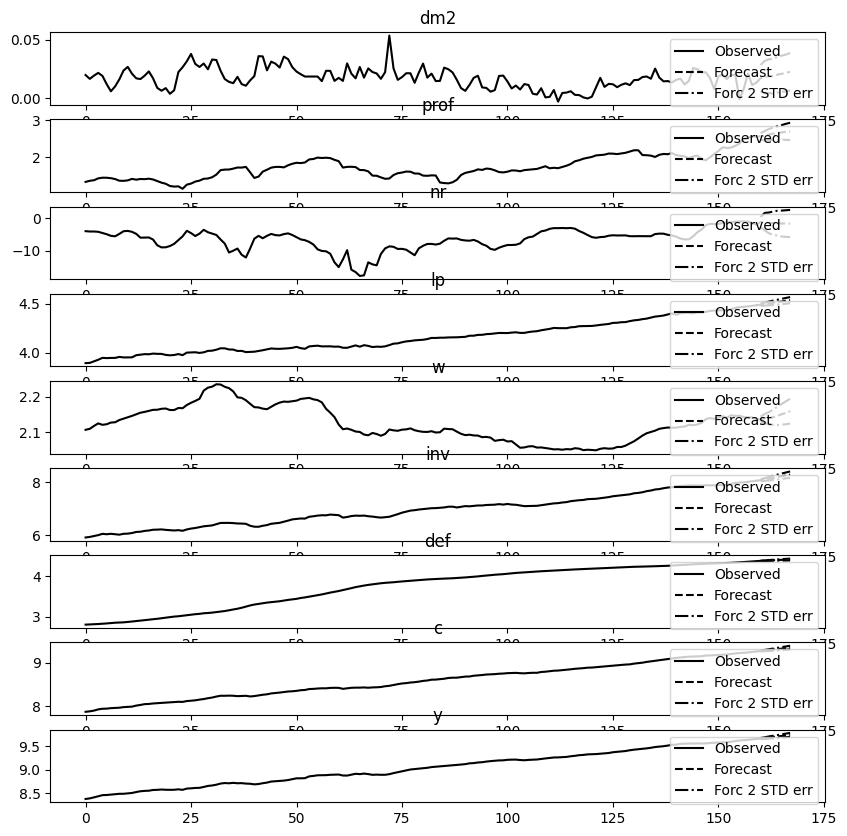

In [25]:
_ = results.plot_forecast(fh)

It works, but we may want to have a better control of the plot. For instance

Text(0.5, 1.0, 'GDP')

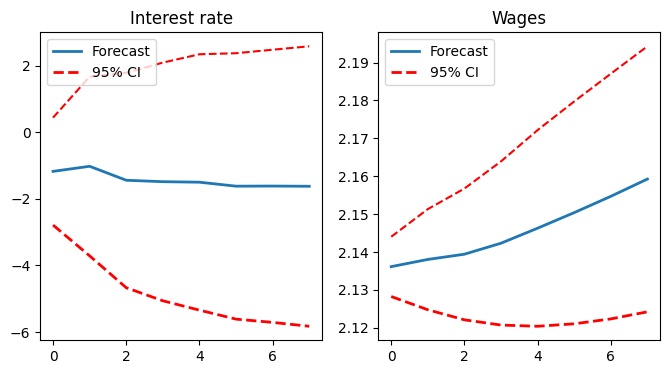

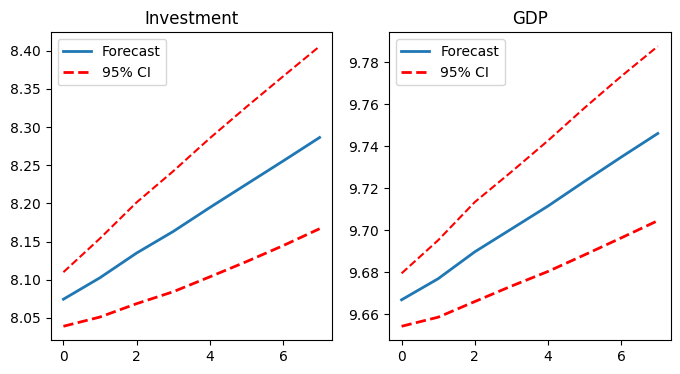

In [26]:
# Graficación de pronósticos para diferentes variables macroeconómicas
# Variables consideradas: tasa de interés (rr), salarios (ww), inversión (ii), PIB (yy)

fig, (ax11, ax12) = plt.subplots(ncols=2, figsize=(8, 4))  # Crea una figura con 2 gráficos en columnas (1 fila, 2 columnas)

# Gráfico 1: Pronóstico de la tasa de interés
ax11.plot(fore[:,2], linewidth=2, label='Forecast')  # Pronóstico central de la tasa de interés
ax11.plot(fore_low[:,2], '--r', linewidth=2, label='95% CI')  # Límite inferior del intervalo de confianza al 95%
ax11.plot(fore_up[:,2], '--r')  # Límite superior del intervalo de confianza al 95%
ax11.legend(loc='upper left')  # Agrega la leyenda en la parte superior izquierda
ax11.set_title('Interest rate')  # Título del gráfico: "Tasa de interés"

# Gráfico 2: Pronóstico de los salarios
ax12.plot(fore[:,4], linewidth=2, label='Forecast')  # Pronóstico central de los salarios
ax12.plot(fore_low[:,4], '--r', linewidth=2, label='95% CI')  # Límite inferior del intervalo de confianza
ax12.plot(fore_up[:,4], '--r')  # Límite superior del intervalo de confianza
ax12.legend(loc='upper left')  # Agrega la leyenda
ax12.set_title('Wages')  # Título del gráfico: "Salarios"

# Nueva figura con otros dos gráficos
fig, (ax21, ax22) = plt.subplots(ncols=2, figsize=(8, 4))  # Crea otra figura con 2 gráficos en columnas

# Gráfico 3: Pronóstico de la inversión
ax21.plot(fore[:,5], linewidth=2, label='Forecast')  # Pronóstico central de la inversión
ax21.plot(fore_low[:,5], '--r', linewidth=2, label='95% CI')  # Límite inferior del intervalo de confianza
ax21.plot(fore_up[:,5], '--r')  # Límite superior del intervalo de confianza
ax21.legend(loc='upper left')  # Agrega la leyenda
ax21.set_title('Investment')  # Título del gráfico: "Inversión"

# Gráfico 4: Pronóstico del PIB
ax22.plot(fore[:,8], linewidth=2, label='Forecast')  # Pronóstico central del PIB
ax22.plot(fore_low[:,8], '--r', linewidth=2, label='95% CI')  # Límite inferior del intervalo de confianza
ax22.plot(fore_up[:,8], '--r')  # Límite superior del intervalo de confianza
ax22.legend(loc='upper left')  # Agrega la leyenda
ax22.set_title('GDP')  # Título del gráfico: "PIB"


In [27]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Definir nombres de las columnas si aún no están bien asignados
DF.columns = ['dm2', 'prof', 'nr', 'lp', 'w', 'inv', 'def', 'c', 'y']

# Ajustar el modelo VAR
model = VAR(DF)
results = model.fit(maxlags=4)  # Ajusta el número de rezagos según sea necesario

# Definir el número de pasos de pronóstico
steps = 8  # Ajusta según tu necesidad

# Generar los valores del pronóstico
forecast_values = results.forecast(results.endog[-results.k_ar:], steps=steps)

# Convertir el pronóstico a un DataFrame
df_forecast = pd.DataFrame(forecast_values, columns=DF.columns)

# Guardar en CSV y Excel
df_forecast.to_csv("forecast.csv", index=False)
df_forecast.to_excel("forecast.xlsx", index=False)

# Mostrar el pronóstico
print(df_forecast.head())

        dm2      prof        nr        lp         w       inv       def  \
0  0.017023  2.566456 -1.176376  4.489335  2.136131  8.074484  4.388308   
1  0.018142  2.583353 -1.023985  4.495457  2.138030  8.102651  4.393287   
2  0.018818  2.616024 -1.443384  4.502721  2.139414  8.134968  4.398821   
3  0.018819  2.639271 -1.486314  4.508977  2.142314  8.163194  4.404330   
4  0.020160  2.656886 -1.501774  4.515023  2.146282  8.194550  4.409165   

          c         y  
0  9.265197  9.666755  
1  9.276778  9.676815  
2  9.287877  9.689605  
3  9.298377  9.700486  
4  9.309960  9.711400  
